DengAI Kaggle competion benchmark beaten 
=====
v2.0
=====
With Facebook Prophet algorithm 
-----

This notebook was made for a job application. First version was more pretty and informative with all pictures and theory. The current one contains mostly the functionality to support the slide deck.

[Slides for DengAI presentation by Evgeny Vlasov](https://docs.google.com/presentation/d/11GtxbYxKQlAWl7Ok4vrP4gYw6pqfkccAFqcRMWuiQ2A/edit?usp=sharing "Slides DengAI project by Evgeny")

### What is DengAI
DengAI competition is hosted by DrivenData

([link](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/))

### Data

22 features like humidity, area of green vegetation, rainfall and temperature. Rows are weekly records from 1990 to 2010.

### Goal

Predict number of dengue fever cases.

Let's code
=====

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

#### Load data

In [2]:
train = pd.read_csv('dengue_features_train.csv')
test = pd.read_csv('dengue_features_test.csv')
labels = pd.read_csv('dengue_labels_train.csv')

#### Slicing, splitting and naming

In [3]:
# slicing 
train['total_cases'] = labels['total_cases']
prophet_data = train[['city', 'week_start_date', 'total_cases']]

# splitting
prophet_data_sj = prophet_data[prophet_data['city'] == 'sj']\
                .drop('city', axis=1)
prophet_data_iq = prophet_data[prophet_data['city'] == 'iq']\
                .drop('city', axis=1)

# same for test data
test_sj = test[test['city'] == 'sj']['week_start_date']
test_iq = test[test['city'] == 'iq']['week_start_date']

# naming
prophet_data_sj.columns, prophet_data_iq.columns = ['ds', 'y'], ['ds', 'y']

Prophet magic
-----

#### Make the function

In [4]:
def create_forecast(train_data, test_data, flex, seas): 
                # flex - flexibility (default 0.05)
                # seas - seasonality (default 10)
            
    
    prophet = Prophet(changepoint_prior_scale=flex, 
                      yearly_seasonality=seas) 
                # make a class 
        
        
    prophet.fit(train_data)
                # train model
        
        
    future_frame = prophet.make_future_dataframe(
        periods=len(test_data), 
        freq='W')
                # make dataframe for future dates
        
    
    forecast = prophet.predict(future_frame)
                # it's time to forecast!
        
        
    prophet.plot(forecast)
                # plot the forecast
    
    
    forecast = forecast[['ds', 'yhat']].yhat\
        .apply(lambda x : int(x))
                # slice off and convert to integers
    
    
    return forecast[len(train_data):]
                

#### Forcasts for Iquitos and San Jose

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


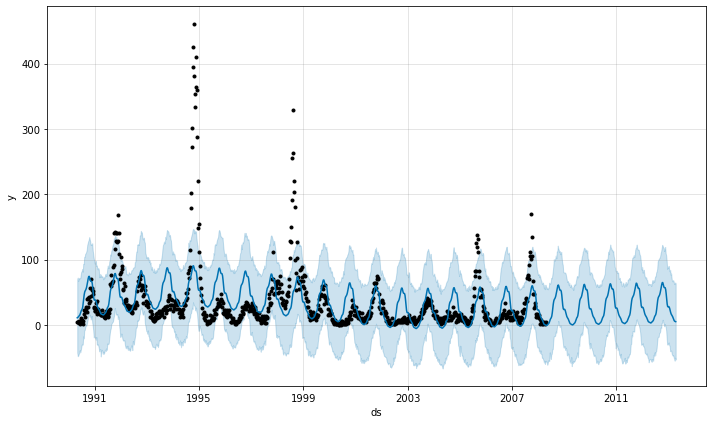

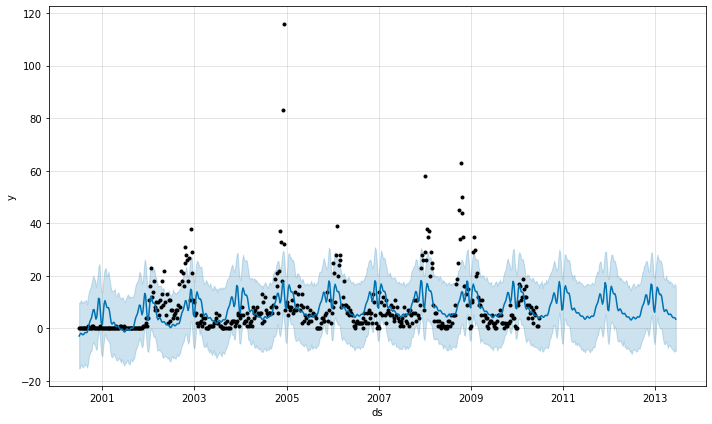

In [5]:
forecast_sj = create_forecast(prophet_data_sj, test_sj, 0.05, 10)
forecast_iq = create_forecast(prophet_data_iq, test_iq, 0.05, 10)

#### Create submission for Kaggle

In [6]:
def create_submission(forecast_sj, forecast_iq, sub_name):
    
    test_index = test[['city', 'year', 'weekofyear']]
    
    output = pd.concat([forecast_sj, forecast_iq])\
        .reset_index().drop(['index'], axis=1)
        
    output.columns = ['total_cases']
    
    pd.concat([test_index, output], axis=1)\
        .set_index(['city']).to_csv(sub_name + '.csv')

In [7]:
create_submission(forecast_sj, forecast_iq, 'prophetflex05seas10')

Submit and tune
-----
After submitting the results to Kaggle the score should be 26.76. Flexibility and seasonality can be changed for better performance of the model.
- increase flexibility for both cities
- decrease seasonality for Iquitos

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


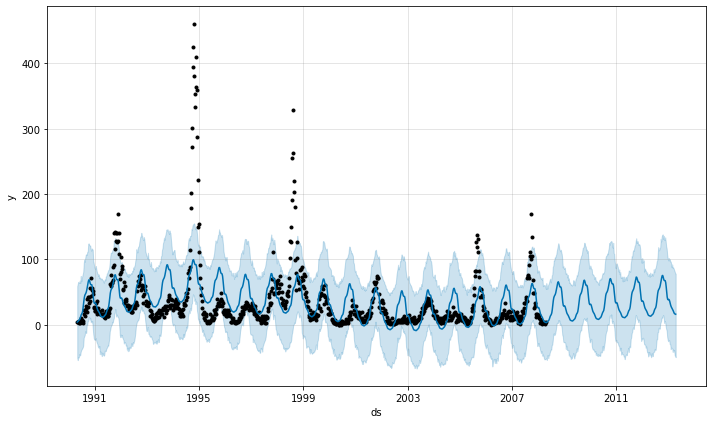

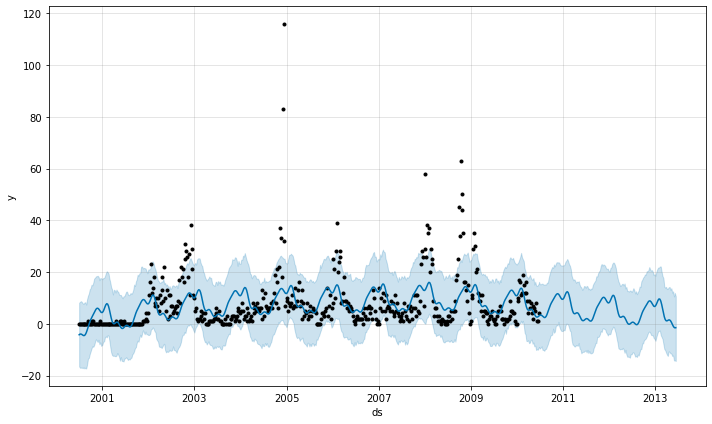

In [8]:
forecast_sj = create_forecast(prophet_data_sj, test_sj, 0.1, 10)
forecast_iq = create_forecast(prophet_data_iq, test_iq, 0.1, 5)
                # flexibility 0.05 => 0.1
                # seasonality 10 => 5 for Iquitos
        
        
create_submission(forecast_sj, forecast_iq, 'prophsjf10s10iqf10s5')
                # create and submit another file

Done!
-----
#### The score now is around 25

Success
-----

##### Note
Version 1.1 included Python code for visualisations and data handling. The code was pretty boring and not essential. 
All visualisations made by this code can be seen in the slides.
***

*Evgeny Vlasov 5/3/2021*